# Exploring Netflix Titles Trends: A Pre- and Post-COVID Analysis

This exploratory data analysis (EDA) investigates trends in movie datasets, focusing on comparing various attributes pre- and post-COVID. The objective is to identify notable shifts in production strategies, viewer preferences, and genre-specific patterns. The analysis includes visualizations and statistical summaries to provide actionable insights into how the film industry evolved during these periods. A KDE(Kernel Density Estimate) plot has been employed to plot continuous variables since KDE plots are particularly useful when comparing multiple distributions and provides a smooth curve making it easier to do a comparison between pre-COVID and post-COVID periods. This notebook includes:

- Ratings Distribution
- Revenue Distribution
- Budget Distribution
- Genre Distribution
- Runtime Distribution
- Production Countries Distribution
- Keywords Distribution

and comparison of some continuous variables with Genre:

- Runtime by Genre
- Ratings by Genre
- Revenue by Genre
- Budget by Genre

This study aims to highlight the implications of these shifts on the industry and inform future strategies.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Load data and style

The analysis utilizes two key DataFrames:

- post_data: This dataset represents movies released post-COVID. It was created by connecting and enriching data from  two sources with the TMDB dataset.

- pre_data: This dataset represents movies released pre-COVID, similarly created by connecting and enriching data from two sources with the TMDB dataset.

In [192]:
post_data = pd.read_csv("PostCovid_Matching_titles_filtered_remaining_v01.csv")
pre_data = pd.read_csv("PreCovid_Matching_titles_filtered_remaining_v01.csv")

sns.set(style="whitegrid")


## Helper function for plotting distributions

In [194]:
def plot_distribution(data, column, title, bins=30, xlabel=None, ylabel="Frequency"):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column].dropna(), bins=bins, kde=True, alpha=0.7)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel if xlabel else column, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.show()

## Ratings Distribution

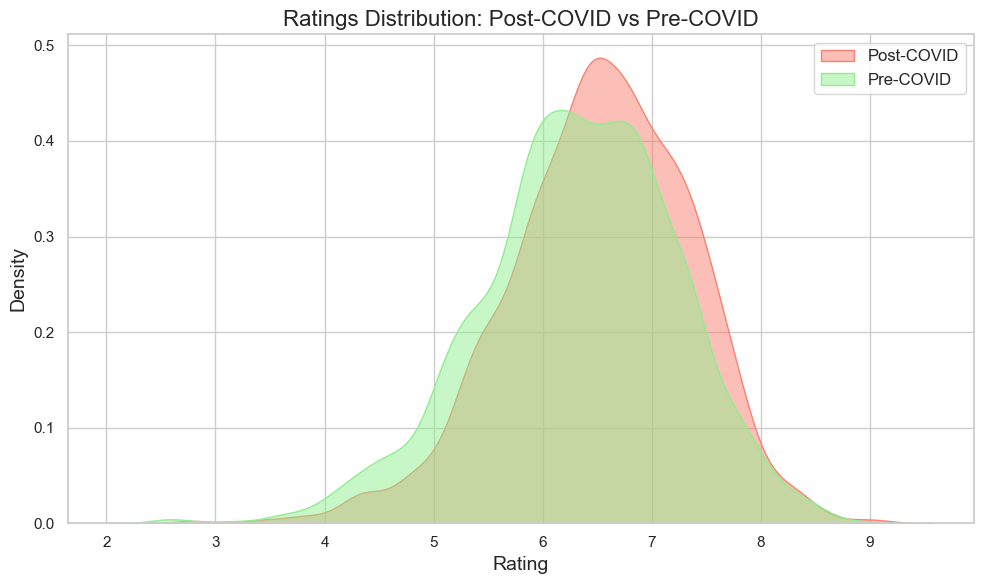

In [244]:
def plot_combined_distribution(data1, data2, column, label1, label2, color1, color2, title, xlabel):
    data1_filtered = data1[(data1[column] > 0) & (data1["vote_count"] >= 10)]
    data2_filtered = data2[(data2[column] > 0) & (data2["vote_count"] >= 10)]
    
    plt.figure(figsize=(10, 6))
    
    sns.kdeplot(data=data1_filtered[column], label=label1, color=color1, fill=True, alpha=0.5)
    sns.kdeplot(data=data2_filtered[column], label=label2, color=color2, fill=True, alpha=0.5)
    
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

plot_combined_distribution(
    post_data, pre_data,
    column="vote_average",
    label1="Post-COVID",
    label2="Pre-COVID",
    color1="salmon",
    color2="lightgreen",
    title="Ratings Distribution: Post-COVID vs Pre-COVID",
    xlabel="Rating"
)


### Observations:

The density plot clearly shows that the curve for the post-COVID period is shifted further to the right along the x-axis, indicating that movie ratings post-COVID were generally higher compared to pre-COVID ratings. This shift could reflect a change in viewer preferences, with audiences potentially being more selective or generous in their ratings as a result of altered viewing habits and content consumption patterns. The concentration of ratings in the higher range post-COVID suggests an overall improvement in the quality of content or a more positive reception of movies during this period.

## Revenue Distribution

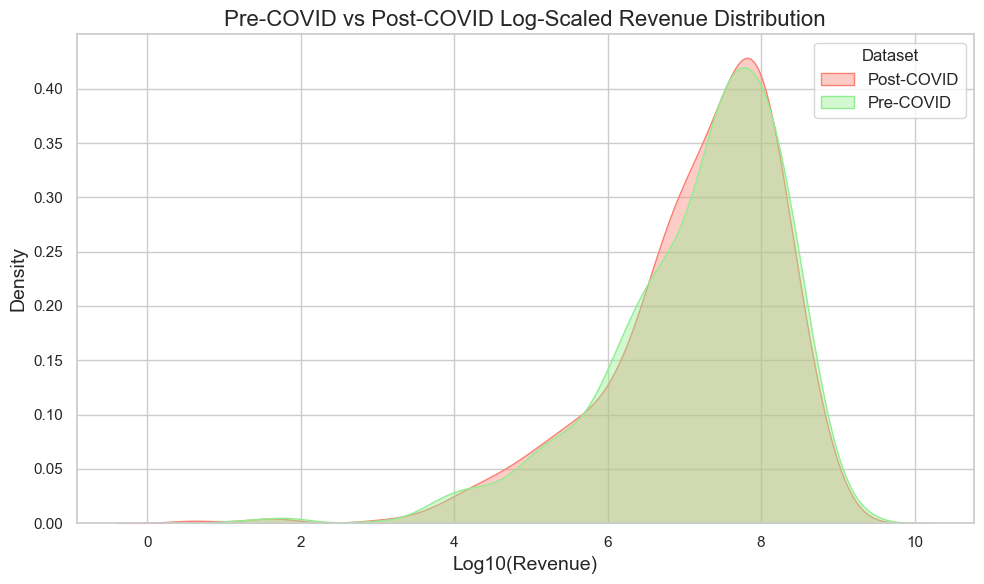

In [210]:

def log_transform_column(data, column):
    return np.log10(data[column])

def plot_combined_revenue_distribution(pre_data, post_data):
    if "revenue" in post_data.columns:
        post_revenue_data = post_data[post_data["revenue"] > 0].copy()
        post_revenue_data["log_revenue"] = log_transform_column(post_revenue_data, "revenue")
    
    if "revenue" in pre_data.columns:
        pre_revenue_data = pre_data[pre_data["revenue"] > 0].copy()
        pre_revenue_data["log_revenue"] = log_transform_column(pre_revenue_data, "revenue")

    plt.figure(figsize=(10, 6))
    
    sns.kdeplot(post_revenue_data["log_revenue"], label="Post-COVID", color="salmon", fill=True, alpha=0.4)
    
    sns.kdeplot(pre_revenue_data["log_revenue"], label="Pre-COVID", color="lightgreen", fill=True, alpha=0.4)
    
    plt.title("Pre-COVID vs Post-COVID Log-Scaled Revenue Distribution", fontsize=16)
    plt.xlabel("Log10(Revenue)", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.legend(title="Dataset", fontsize=12)
    plt.tight_layout()
    plt.show()

plot_combined_revenue_distribution(pre_data, post_data)


### Observations:

The revenue has remained relatively consistent overall, but the post-COVID period exhibits a more pronounced peak in the denser region of the distribution plot. This suggests that, while the overall revenue levels have not changed drastically, there may be a shift towards higher revenue in certain periods post-COVID. The concentration of values in the higher range could indicate stronger performance or growth in specific segments of the market, potentially driven by changes in consumer behavior or market conditions during this period.

## Budget Distribution

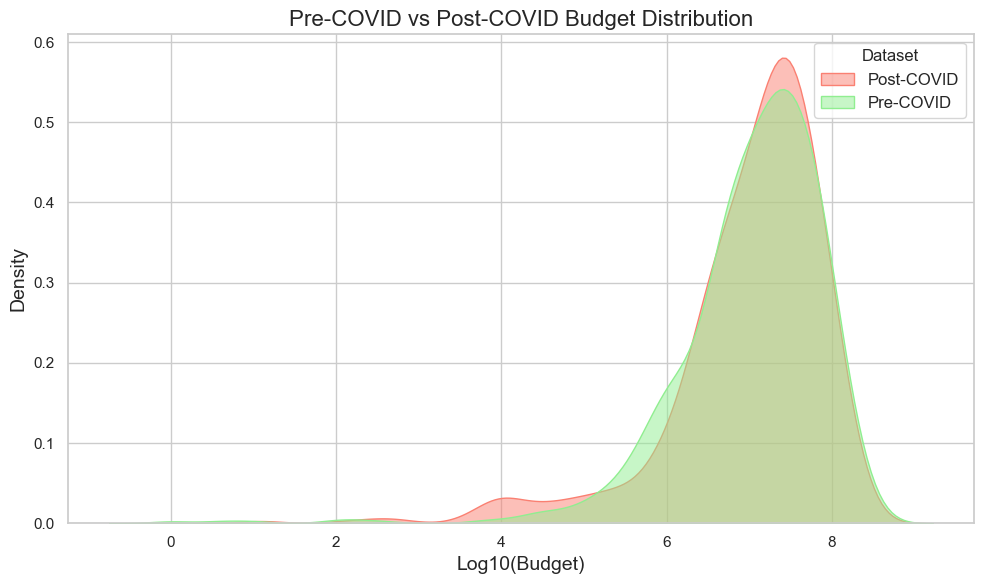

In [214]:
def plot_combined_budget_distribution(pre_data, post_data):
    if "budget" in post_data.columns:
        post_budget_data = post_data[post_data["budget"] > 0].copy()
        post_budget_data["log_budget"] = log_transform_column(post_budget_data, "budget")
    
    if "budget" in pre_data.columns:
        pre_budget_data = pre_data[pre_data["budget"] > 0].copy()
        pre_budget_data["log_budget"] = log_transform_column(pre_budget_data, "budget")

    plt.figure(figsize=(10, 6))
    
    sns.kdeplot(post_budget_data["log_budget"], label="Post-COVID", color="salmon", fill=True, alpha = 0.5)
    
    sns.kdeplot(pre_budget_data["log_budget"], label="Pre-COVID", color="lightgreen", fill=True, alpha = 0.5)
    
    plt.title("Pre-COVID vs Post-COVID Budget Distribution", fontsize=16)
    plt.xlabel("Log10(Budget)", fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.legend(title="Dataset", fontsize=12)
    plt.tight_layout()
    plt.show()

plot_combined_budget_distribution(pre_data, post_data)


### Observations:

The log-scaled budget distribution reveals a noticeable shift in the post-COVID period, with an increase in both lower and higher budget films, while mid-budget films appear more prominently in the pre-COVID distribution. The densest region remains similar for both periods, but the post-COVID curve shows a higher peak, indicating a concentration of films with either lower or higher budgets, potentially reflecting changes in production strategies or market demand post-COVID. This shift could suggest a polarizing trend in film budgets, with more emphasis on either lower-cost or blockbuster films, while mid-tier productions become less common.

## Genre Distribution

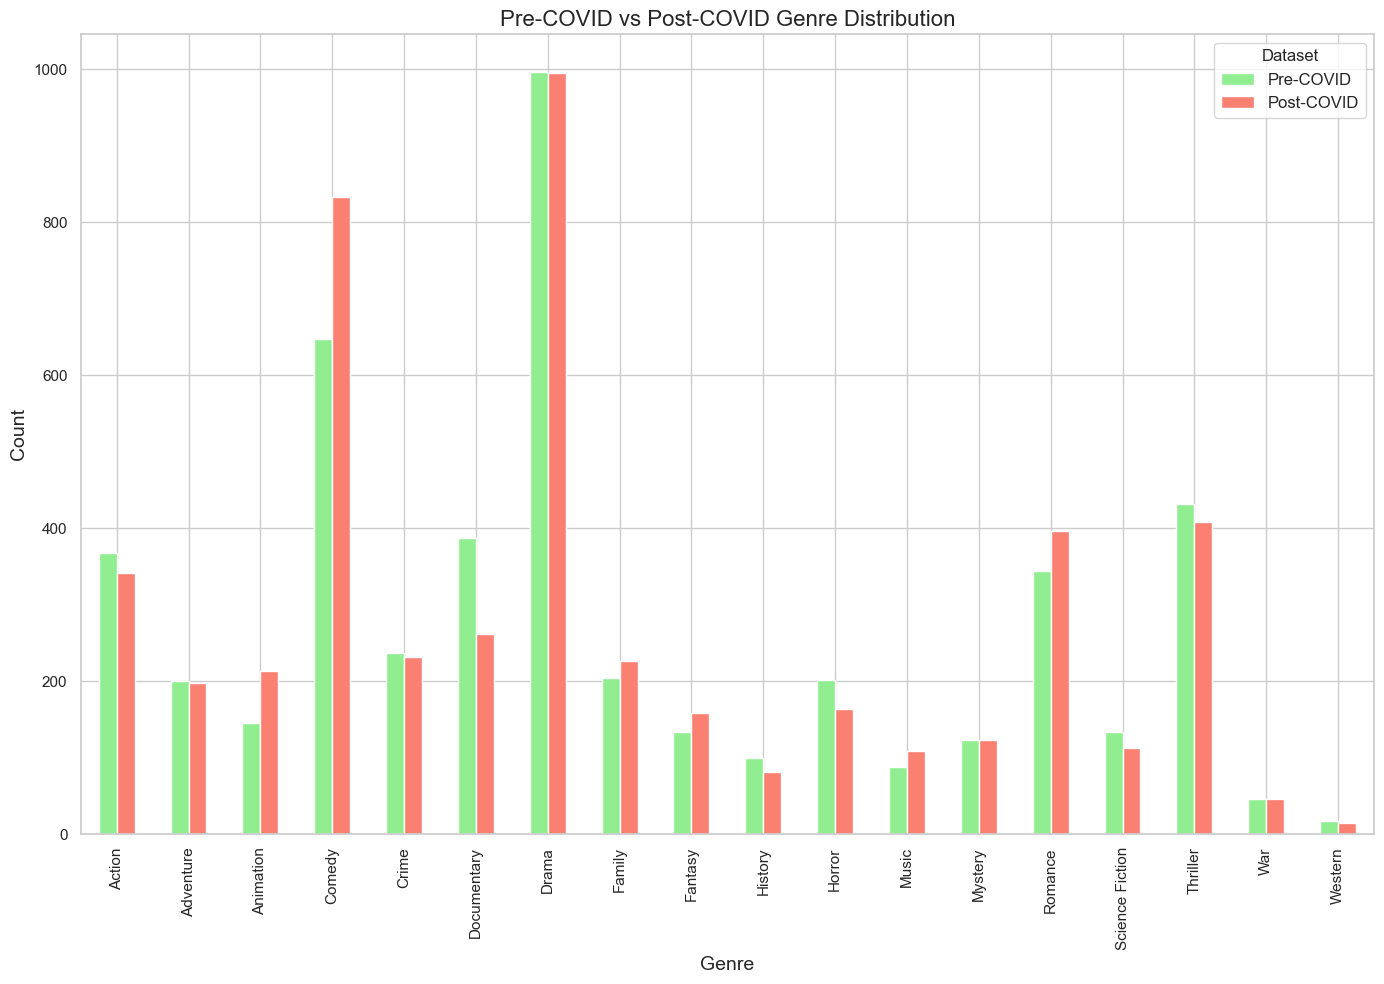

In [216]:
def plot_combined_genre_distribution(pre_data, pre_genre_col, post_data, post_genre_col, title):
    pre_genres = pre_data[pre_genre_col].str.split(",").explode().str.strip()
    pre_genres = pre_genres[pre_genres.str.lower() != "tv movie"]
    pre_genre_counts = pre_genres.value_counts()
    
    post_genres = post_data[post_genre_col].str.split(",").explode().str.strip()
    post_genres = post_genres[post_genres.str.lower() != "tv movie"]
    post_genre_counts = post_genres.value_counts()

    combined_counts = pd.DataFrame({
        "Pre-COVID": pre_genre_counts,
        "Post-COVID": post_genre_counts
    }).fillna(0)

    combined_counts.sort_index(inplace=True)
    combined_counts.plot(kind="bar", figsize=(14, 10), color=["lightgreen", "salmon"])
    plt.title(title, fontsize=16)
    plt.xlabel("Genre", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.legend(title="Dataset", fontsize=12)
    plt.tight_layout()
    plt.show()

plot_combined_genre_distribution(
    pre_data, 
    "genres", 
    post_data, 
    "genres_y", 
    "Pre-COVID vs Post-COVID Genre Distribution"
)

### Observations:

The genre distribution plot indicates an increase in the number of titles in the post-COVID period for genres such as Animation, Comedy, Family, Fantasy, and Music. Conversely, genres like Action, Crime, Documentary, Horror, and Thriller have seen a decrease in the number of titles. Adventure, Drama, and Mystery genres have remained relatively consistent across both periods, suggesting that while some genres have experienced growth or decline, others have maintained stable production levels. This could reflect shifting audience preferences or changes in content production during the post-COVID era.

## Runtime Distribution

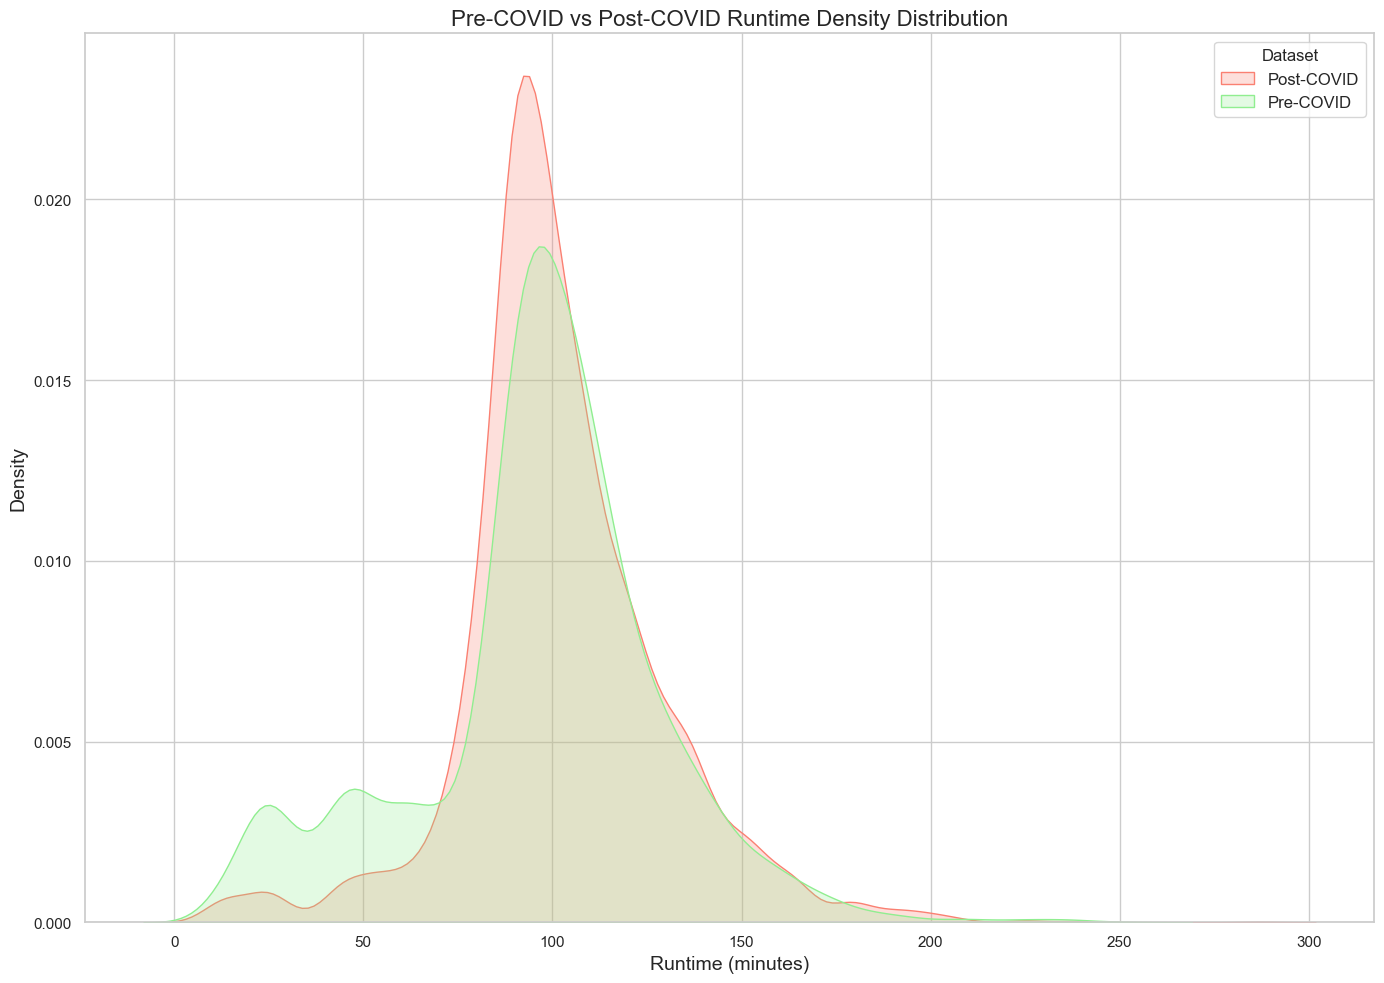

In [322]:
pre_data_filtered = pre_data[pre_data["runtime"] >= 10]
post_data_filtered = post_data[post_data["runtime_x"] >= 10]

def plot_combined_runtime_distribution(pre_data, post_data, title, runtime_col_pre, runtime_col_post, xlabel="Runtime (minutes)"):
    post_runtime_data = post_data[post_data[runtime_col_post] <= 600][runtime_col_post].reset_index(drop=True)
    pre_runtime_data = pre_data[pre_data[runtime_col_pre] <= 600][runtime_col_pre].reset_index(drop=True)
    
    combined_runtime_data = pd.DataFrame({
        "Post-COVID": post_runtime_data,
        "Pre-COVID": pre_runtime_data
    })
    
    plt.figure(figsize=(14, 10))
    sns.kdeplot(data=combined_runtime_data, fill=True, common_norm=False, palette=["lightgreen", "salmon"])
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.legend(labels=["Post-COVID", "Pre-COVID"], title="Dataset", fontsize=12)
    plt.tight_layout()
    plt.show()

plot_combined_runtime_distribution(
    pre_data_filtered, 
    post_data_filtered, 
    "Pre-COVID vs Post-COVID Runtime Density Distribution", 
    runtime_col_pre="runtime", 
    runtime_col_post="runtime_x"
)


### Observations:

Both the Pre-COVID and Post-COVID runtime distributions appear to follow a similar pattern, peaking at around 90-100 minutes. This suggests that most titles during both periods had runtimes clustered around this range.
- Density Variation:
The Post-COVID dataset (red) shows a slightly higher peak density compared to the Pre-COVID dataset (green). This could imply a tighter clustering of runtimes during the Post-COVID period.
- Longer Runtimes:
Both distributions taper off for longer runtimes (>150 minutes), indicating that titles with exceptionally long runtimes were rare in both periods.
- Short Runtimes:
There is a noticeable difference in the short runtime range (<50 minutes). The Pre-COVID dataset shows more density for shorter titles than the Post-COVID dataset. This could indicate a reduction in shorter runtime titles after COVID.
These insights suggest some changes in runtime distribution between the Pre-COVID and Post-COVID periods, with notable differences at the shorter and peak runtime ranges.

## Production Countries Distribution

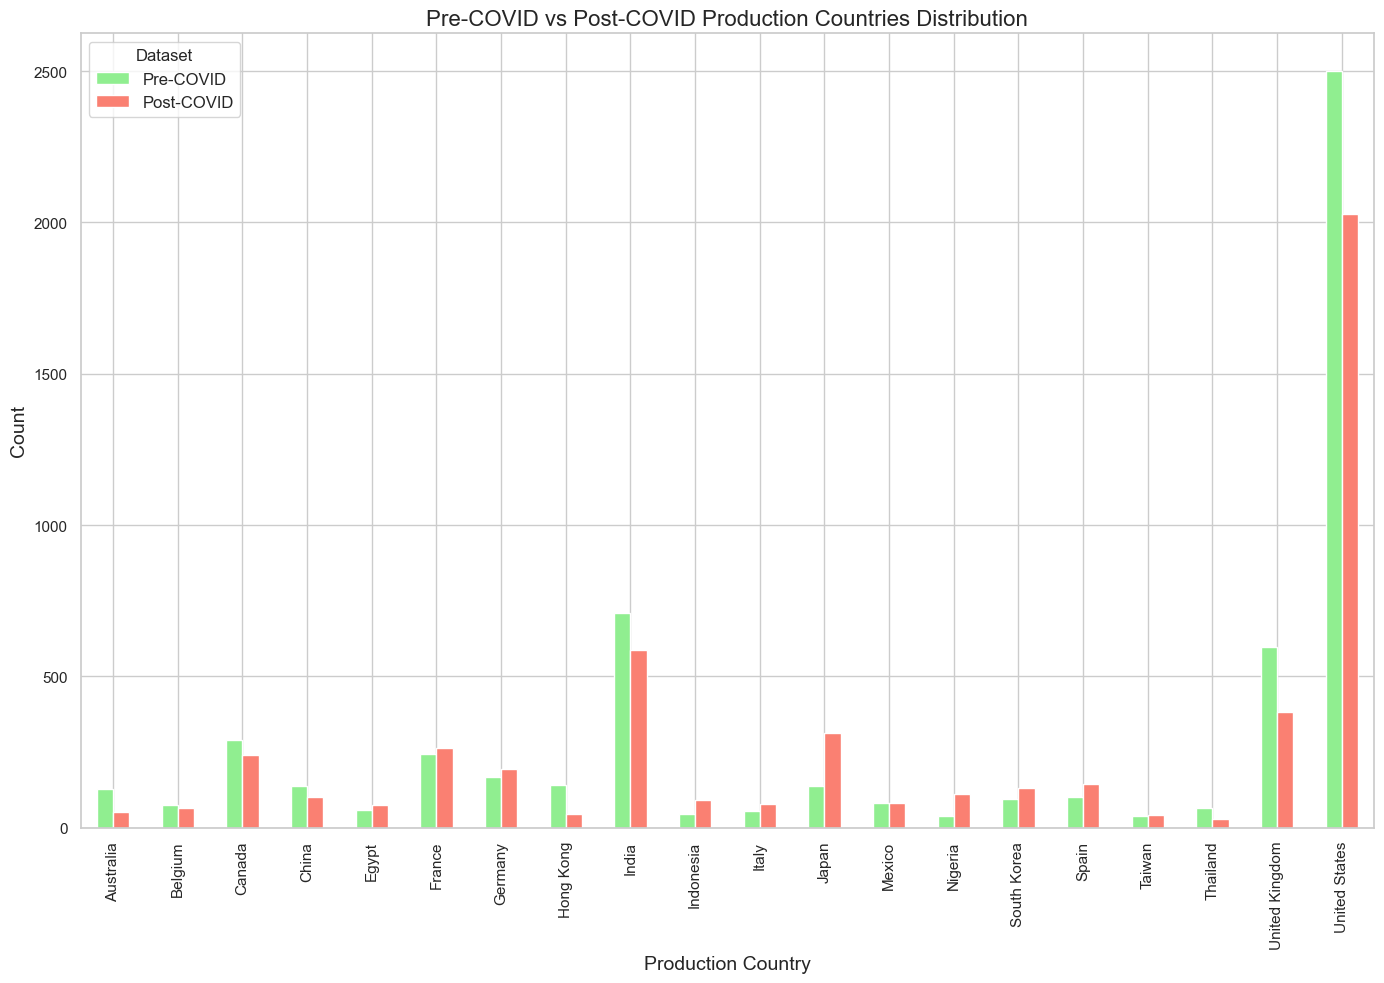

In [242]:
def plot_combined_production_countries(pre_data, pre_country_col, post_data, post_country_col, title, country_mapping):
    pre_countries = pre_data[pre_country_col].str.split(",").explode().str.strip()
    pre_country_counts = pre_countries.value_counts()

    post_countries = post_data[post_country_col].str.extractall(r"'?([A-Z]{2})'?\]?")[0]
    post_countries_mapped = post_countries.map(country_mapping)
    
    post_country_counts = post_countries_mapped.dropna().value_counts()

    combined_counts = pd.DataFrame({
        "Pre-COVID": pre_country_counts,
        "Post-COVID": post_country_counts
    }).fillna(0)

    combined_counts = combined_counts.nlargest(20, ["Pre-COVID", "Post-COVID"])
    
    combined_counts.sort_index(inplace=True)
    combined_counts.plot(kind="bar", figsize=(14, 10), color=["lightgreen", "salmon"])
    plt.title(title, fontsize=16)
    plt.xlabel("Production Country", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.legend(title="Dataset", fontsize=12)
    plt.tight_layout()
    plt.show()

plot_combined_production_countries(
    pre_data, 
    "country", 
    post_data, 
    "production_countries_x", 
    "Pre-COVID vs Post-COVID Production Countries Distribution",
    country_mapping
)


### Observations:

Although the number of titles produced post-COVID decreased for the Big-3 production countries—United States, India, and the United Kingdom—several other countries, including Japan, Nigeria, Spain, and South Korea, saw an increase in the number of titles. Even Canada, the fourth-largest production country, experienced a decline. Japan, in particular, showed a significant increase. Countries like France, Germany, Mexico, and Belgium remained relatively stable in terms of title production. Despite a notable decrease, the United States still leads in total number of titles, far surpassing other countries, with India in second place showing a slight decrease, followed by the UK, which experienced a more substantial decline.

## Keywords Distribution

To analyze the distribution of keywords associated with movies in the datasets, a WordCloud visualization was employed. This technique helps highlight the most frequently occurring keywords, providing insights into thematic trends in movie production pre- and post-COVID.


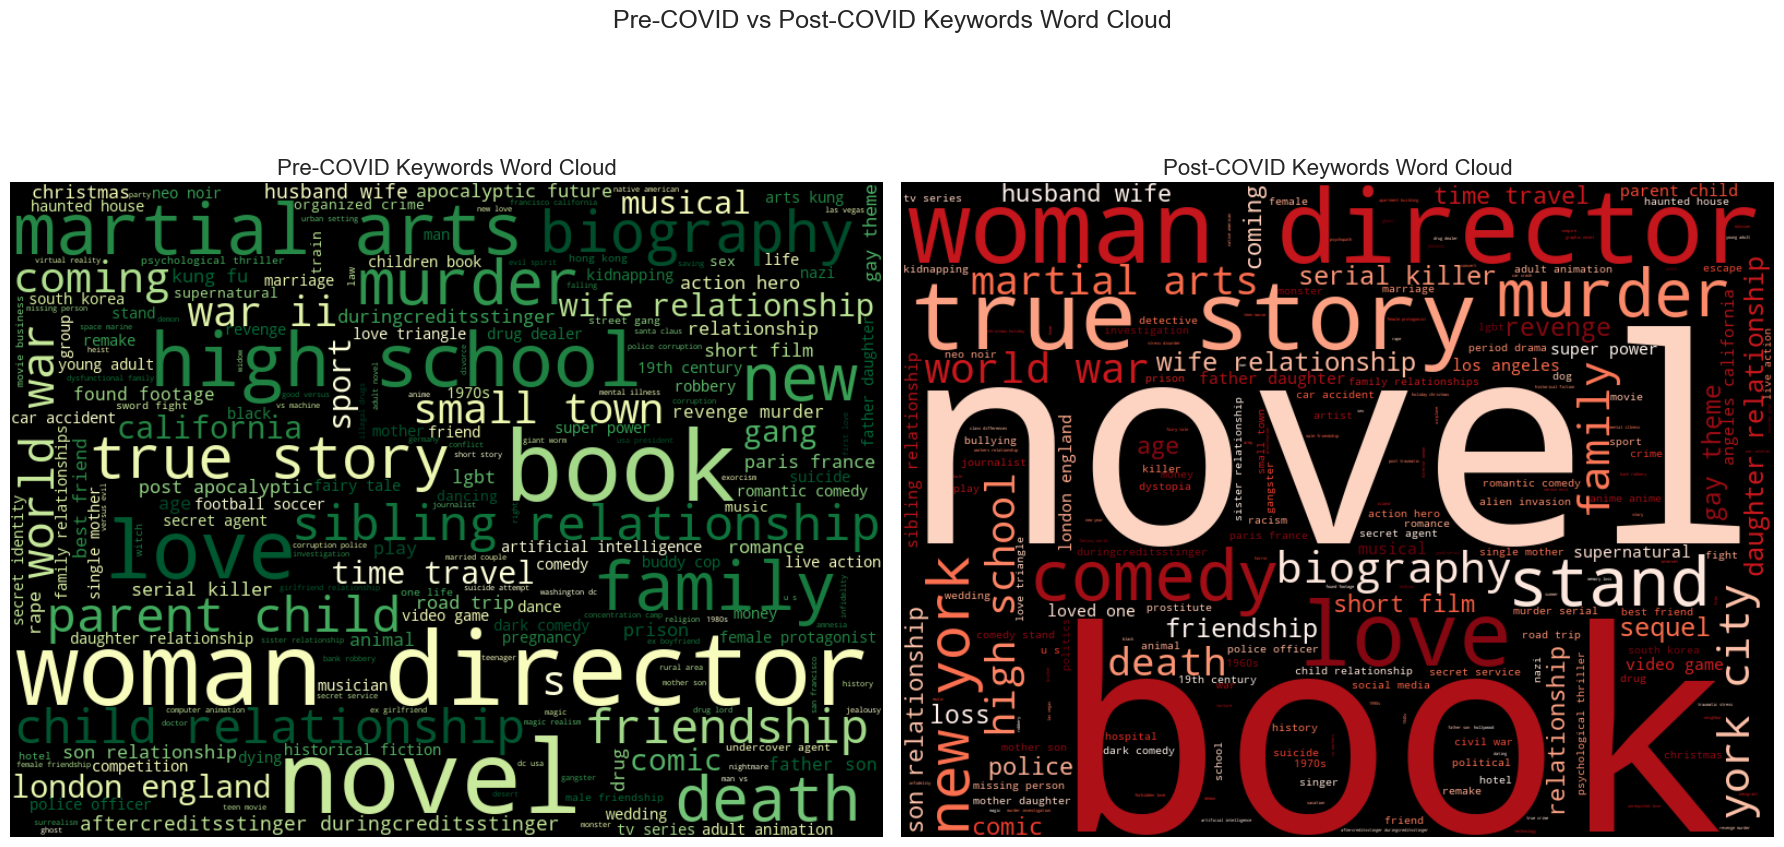

In [234]:
from wordcloud import WordCloud

def plot_combined_keywords_wordcloud(pre_data, post_data, title):
    pre_keywords = pre_data["keywords"].str.split(",").explode().str.strip().dropna()
    pre_keywords_text = " ".join(pre_keywords)
    pre_keywords_text = pre_keywords_text.replace("based", "")
    pre_keywords_text = pre_keywords_text.replace("loved one", "") 
    pre_keywords_text = pre_keywords_text.replace("angeles", "")
    pre_keywords_text = pre_keywords_text.replace("los", "")
    pre_keywords_text = pre_keywords_text.replace("york city", "")
    pre_keywords_text = pre_keywords_text.replace("stand", "stand up")

    post_keywords = post_data["keywords"].str.split(",").explode().str.strip().dropna()
    post_keywords_text = " ".join(post_keywords)
    post_keywords_text = post_keywords_text.replace("based", "")
    post_keywords_text = post_keywords_text.replace("ii", "")
    post_keywords_text = post_keywords_text.replace("stand", "stand up")

    pre_wordcloud = WordCloud(width=800, height=600, background_color="black", colormap="YlGn").generate(pre_keywords_text)
    post_wordcloud = WordCloud(width=800, height=600, background_color="black", colormap="Reds").generate(post_keywords_text)

    fig, axs = plt.subplots(1, 2, figsize=(18, 10))
    axs[0].imshow(pre_wordcloud, interpolation="bilinear")
    axs[0].axis("off")
    axs[0].set_title("Pre-COVID Keywords Word Cloud", fontsize=16)

    axs[1].imshow(post_wordcloud, interpolation="bilinear")
    axs[1].axis("off")
    axs[1].set_title("Post-COVID Keywords Word Cloud", fontsize=16)

    fig.suptitle(title, fontsize=18)
    plt.tight_layout()
    plt.show()

plot_combined_keywords_wordcloud(pre_data, post_data, "Pre-COVID vs Post-COVID Keywords Word Cloud")



### Observations:

#### Pre-COVID Keywords:

The WordCloud for pre-COVID movies shows a more uniform distribution of word sizes, indicating a relatively balanced emphasis across various themes.

#### Post-COVID Keywords:

The WordCloud for post-COVID movies highlights notably larger words like "novel," "book," and "true story," suggesting a significant increase in titles based on literature or real-life events.

Keywords such as "comedy" and "murder" also appear more prominently, reflecting a potential shift in audience preferences or production focus towards these themes.

## Comparison - Post-Covid vs Pre-Covid (Runtime by Genre)

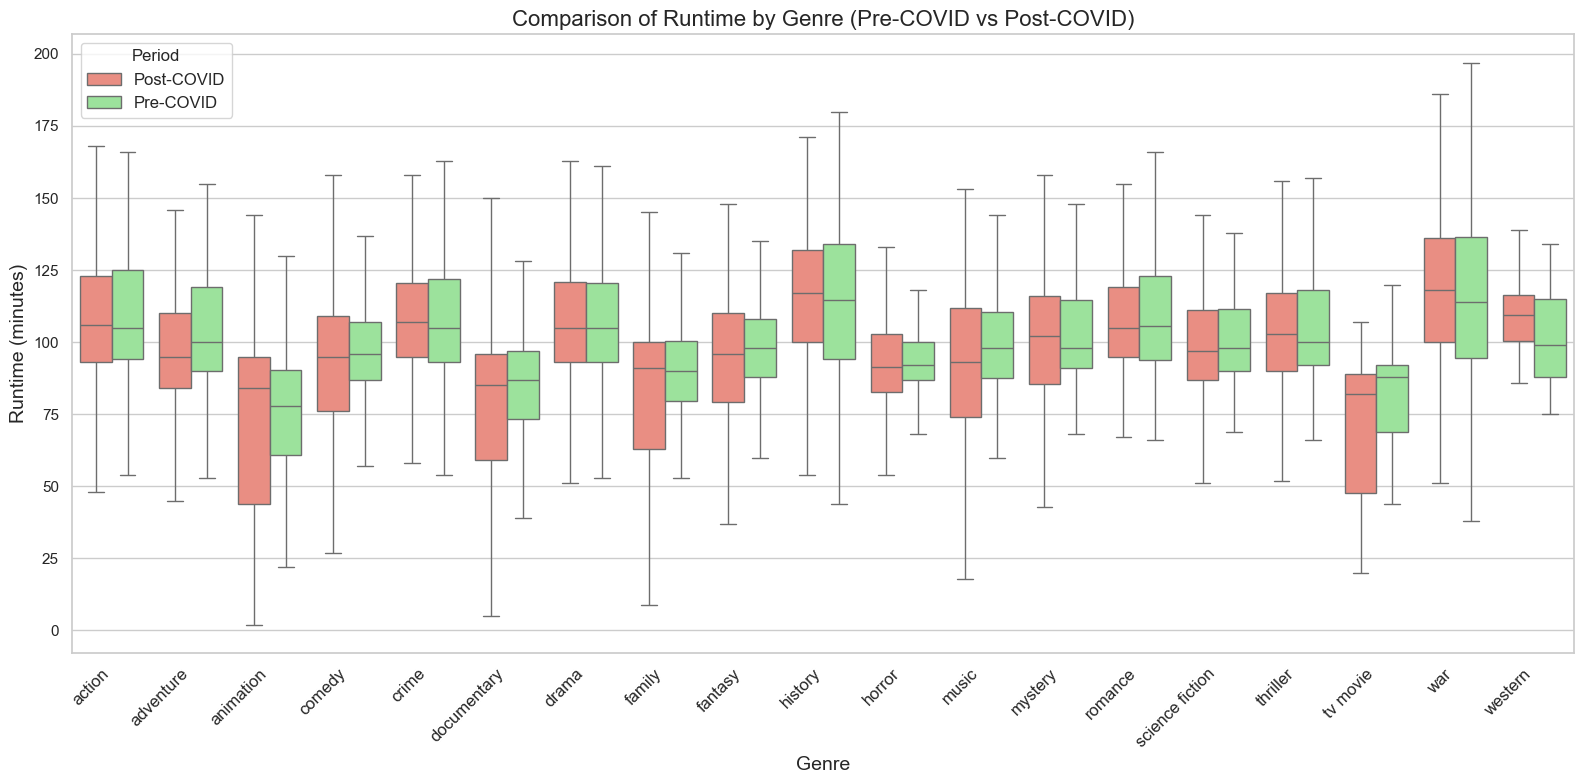

In [315]:
post_data['period'] = 'Post-COVID'
pre_data['period'] = 'Pre-COVID'

post_data = post_data.assign(genres_y=post_data['genres_y'].str.split(",")).explode('genres_y')
post_data['genres_y'] = post_data['genres_y'].str.strip().str.lower()

pre_data = pre_data.assign(genres=pre_data['genres'].str.split(",")).explode('genres')
pre_data['genres'] = pre_data['genres'].str.strip().str.lower()

combined_data = pd.concat([
    post_data[['runtime_x', 'genres_y', 'period']].rename(columns={'runtime_x': 'runtime', 'genres_y': 'genre'}),
    pre_data[['runtime', 'genres', 'period']].rename(columns={'genres': 'genre'})
], ignore_index=True)

combined_data = combined_data[(combined_data['runtime'] <= 300) & combined_data['genre'].notna()]

combined_data['genre'] = combined_data['genre'].str.strip()
genre_order = sorted(combined_data['genre'].unique())

plt.figure(figsize=(16, 8))
sns.boxplot(
    data=combined_data,
    x='genre',
    y='runtime',
    hue='period',
    order=genre_order,
    showfliers=False,
    palette={'Pre-COVID': 'lightgreen', 'Post-COVID': 'salmon'}
)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Comparison of Runtime by Genre (Pre-COVID vs Post-COVID)', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Runtime (minutes)', fontsize=14)
plt.legend(title='Period', fontsize=12)
plt.tight_layout()
plt.show()


### Observations:

To understand how movie runtimes evolved across genres during the post-COVID period compared to pre-COVID, runtime distributions were analyzed. The key findings include:

Post-COVID runtimes for Animation and Family genres show a noticeable increase in their median values compared to pre-COVID. This could indicate a shift towards longer storytelling formats in family-oriented genres.

#### Action and Adventure:

Runtimes in these genres remain relatively consistent across both periods, suggesting sustained audience expectations for these genres.

#### Documentaries:

Post-COVID, there is a wider spread in runtimes for documentaries, indicating a diverse approach to storytelling, potentially driven by increased production of short-form content and feature-length documentaries.

#### Drama and Thriller:

Minimal changes were observed in runtime distributions, implying stability in audience preferences for these genres.

## Comparison of continuous variables with Genre

In [257]:
def plot_metric_by_genre_combined(pre_data, pre_genre_col, pre_metric_col, post_data, post_genre_col, post_metric_col, title, ylabel):
    pre_genres_exploded = pre_data.copy()
    pre_genres_exploded[pre_genre_col] = pre_genres_exploded[pre_genre_col].str.split(",").explode().str.strip()
    pre_genres_exploded = pre_genres_exploded[
        (pre_genres_exploded[pre_metric_col] > 0) & (pre_genres_exploded[pre_genre_col].str.lower() != "tv movie")
    ]
    
    post_genres_exploded = post_data.copy()
    post_genres_exploded[post_genre_col] = post_genres_exploded[post_genre_col].str.split(",").explode().str.strip()
    post_genres_exploded = post_genres_exploded[
        (post_genres_exploded[post_metric_col] > 0) & (post_genres_exploded[post_genre_col].str.lower() != "tv movie")
    ]
    
    pre_grouped = pre_genres_exploded.groupby(pre_genre_col)[pre_metric_col].mean().sort_index()
    post_grouped = post_genres_exploded.groupby(post_genre_col)[post_metric_col].mean().sort_index()
    
    combined_metrics = pd.DataFrame({
        "Pre-COVID": pre_grouped,
        "Post-COVID": post_grouped
    }).fillna(0)

    combined_metrics.plot(kind="bar", figsize=(14, 10), color=["lightgreen", "salmon"])
    plt.title(title, fontsize=16)
    plt.xlabel("Genre", fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(title="Dataset", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


## Ratings distribution by Genre

Overview: The box plot compares the average ratings of movies across genres for Pre-COVID and Post-COVID periods.

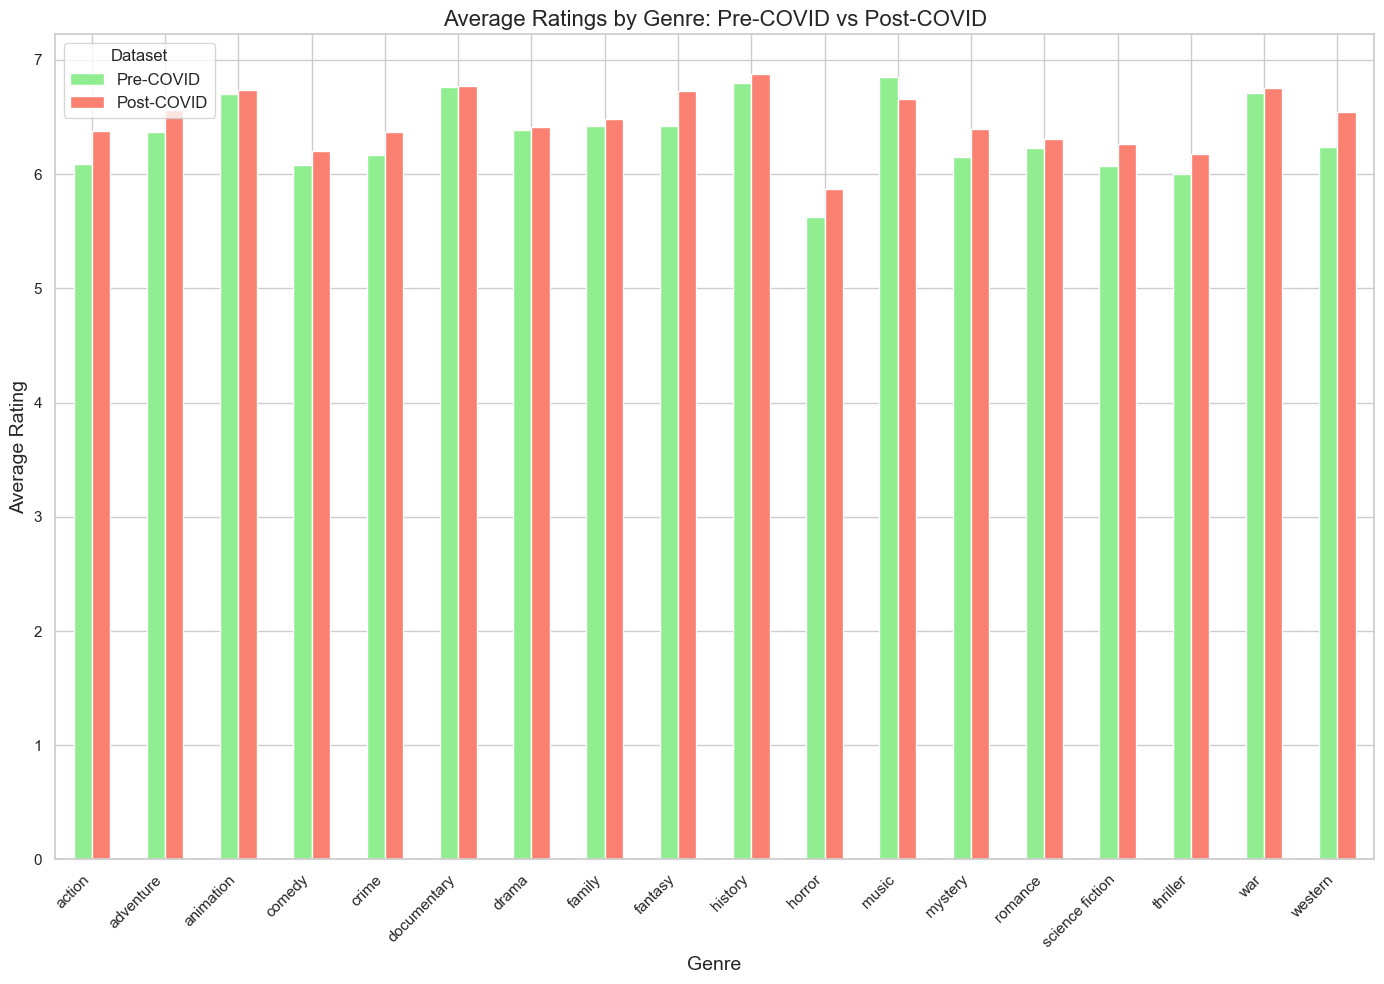

In [255]:
plot_metric_by_genre_combined(
    pre_data=pre_data,
    pre_genre_col="genres",
    pre_metric_col="vote_average",
    post_data=post_data,
    post_genre_col="genres_y",
    post_metric_col="vote_average",
    title="Average Ratings by Genre: Pre-COVID vs Post-COVID",
    ylabel="Average Rating"
)

### Observations:
- The Post-COVID period shows slightly more variability in ratings for genres like Action, Adventure and Horror, possibly reflecting changing audience preferences during the pandemic.
- Genres like Animation and Family exhibit relatively consistent ratings between Pre-COVID and Post-COVID periods, indicating sustained quality and appeal.


## Revenue distribution by Genre

Overview: This analysis explores the average revenue generated by movies in each genre.

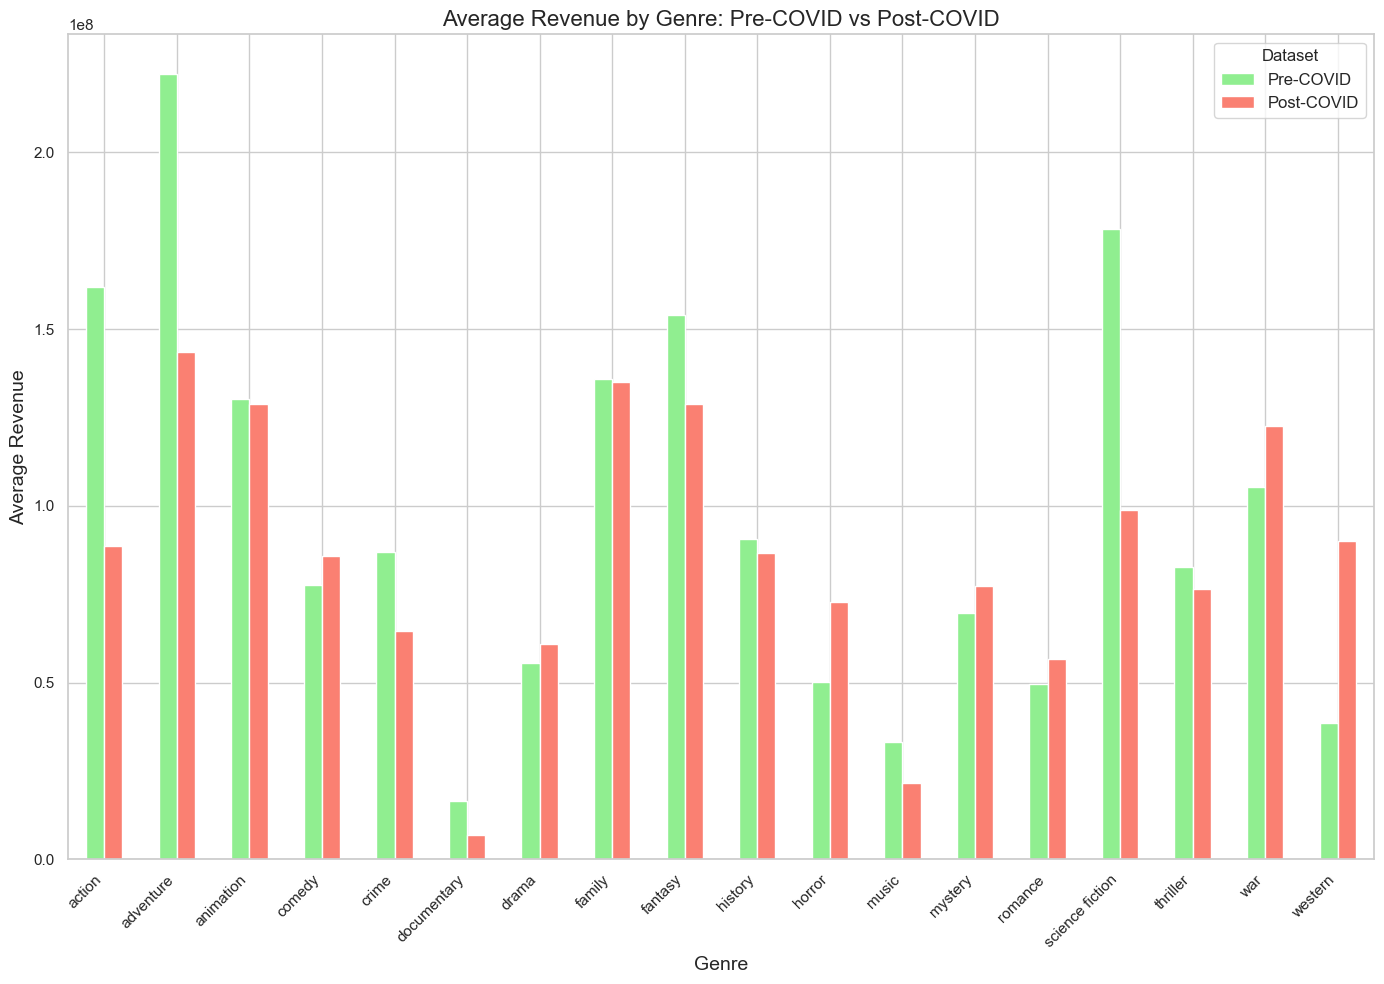

In [259]:
plot_metric_by_genre_combined(
    pre_data=pre_data,
    pre_genre_col="genres",
    pre_metric_col="revenue",
    post_data=post_data,
    post_genre_col="genres_y",
    post_metric_col="revenue",
    title="Average Revenue by Genre: Pre-COVID vs Post-COVID",
    ylabel="Average Revenue"
)

### Observations:
- Action, Adventure, and Science-Fiction genres consistently dominate revenue generation, both Pre-COVID and Post-COVID. These genres likely benefit from big-budget franchises and international appeal.
- Comedy, Drama and Romance genres maintain steady revenue performance across periods, likely due to their appeal as lower-budget, high-impact entertainment options.
- Family-friendly genres like Animation and Family show resilience in revenue, possibly driven by streaming releases and demand for all-age entertainment during the pandemic.


## Budget distribution by Genre

Overview: The plot examines the average budget allocated to movies across genres.

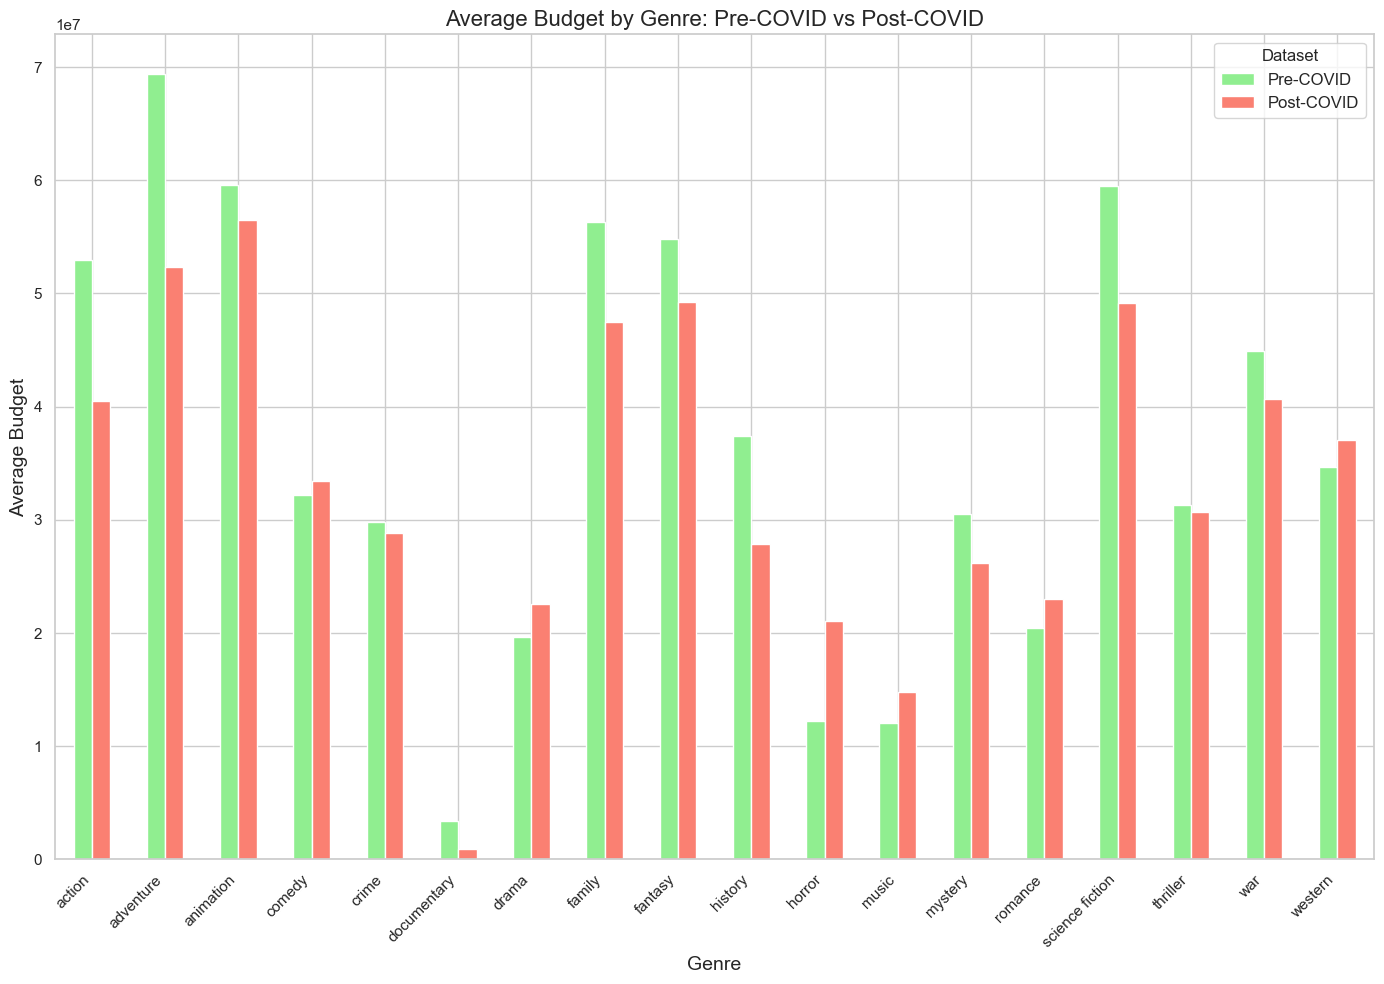

In [261]:
plot_metric_by_genre_combined(
    pre_data=pre_data,
    pre_genre_col="genres",
    pre_metric_col="budget",
    post_data=post_data,
    post_genre_col="genres_y",
    post_metric_col="budget",
    title="Average Budget by Genre: Pre-COVID vs Post-COVID",
    ylabel="Average Budget"
)


### Observations:
- Action, Adventure, Fantasy and Sci-Fi genres have the highest budgets, which aligns with the expensive nature of visual effects and international blockbuster productions.
- During the Post-COVID period, certain genres like History and Mystery exhibit lower budgets, reflecting industry caution in greenlighting mid-budget productions.
- Genres such as Horror, Music and Documentary continue to be produced with lower budgets, maintaining their status as cost-effective genres.


#### Genres with Consistency:

Genres like Comedy, Drama and Romance show relatively stable performance in ratings, revenue, and budget across both periods, suggesting their steady appeal and showing little to no impact to external disruptions.

#### Impact of the Pandemic:

The pandemic seems to have increased audience demand for escapist genres like Action, Adventure, and Fantasy, as the ratings have increased for these genres.

#### Big-Budget vs. Low-Budget Trends:

Big-budget genres like Action, Adventure, Fantasy and Science Fiction saw a reduce in revenue as well as the budget post-covid compared to pre-covid. This might be due to restrictions during covid as these genres require larger scale productions.

Low-budget genres like Horror and Music continue to perform steadily, but the revenue seems to have gone down.

## Conclusion
The analysis reveals distinct shifts in the movie industry’s dynamics across ratings, revenue, and budgets during the Pre-COVID and Post-COVID periods. While some genres demonstrated resilience, others faced challenges reflective of changing audience preferences and production constraints.

#### Resilient Genres:
Family-friendly genres like Animation and Family, and low-budget genres like Horror and Music, maintained consistent ratings and appeal. These genres adapted well to pandemic-related shifts, leveraging streaming platforms and low production costs to sustain their performance.

#### Challenges for Big-Budget Genres:
Traditionally dominant genres such as Action, Adventure, Fantasy, and Science Fiction saw reduced budgets and revenues during the Post-COVID period. This decline likely stems from the logistical challenges and restrictions imposed on large-scale productions during the pandemic, underscoring the vulnerability of high-budget films to external disruptions.

#### Audience Preference Shifts:
The Post-COVID period saw increased variability in ratings for genres like Action, Adventure, and Horror, reflecting the evolving tastes of audiences. Escapist genres gained popularity, driven by the demand for visually engaging, immersive entertainment during uncertain times.

#### Economic Caution:
Mid-budget genres such as Drama, Comedy, and Romance maintained steady revenue and budgets across periods. However, genres like History and Mystery experienced reduced budgets, highlighting cautious investment decisions in less commercially predictable genres.

#### Final Takeaway:
The pandemic has underscored the importance of adaptability in the film industry. While large-scale productions faced setbacks, genres that thrive on modest budgets and family appeal proved to be resilient. Moving forward, balancing blockbuster ambitions with economic prudence and leveraging streaming platforms for diverse genres could help the industry navigate uncertainties and maximize audience engagement.

Overall, this analysis underscores the resilience of the movie industry in adapting to changing circumstances and audience preferences during and after the COVID-19 pandemic. The findings provide valuable insights for filmmakers, producers, and marketers to tailor strategies for future content creation and distribution.